# Machine Learning: Assignment 5 
## SVM plus Other Classification Method (max. 10p)

The dataset for the assignment is "Date Fruit Datasets" file you can find from [Date_Fruit_Datasets.xlsx](data/Date_Fruit_Datasets.xlsx), which contains 898 rows and 34 columns of data about dates and a column telling the species of dates.

There are **seven** (**7**) date fruit species in the dataset, so this is **multi-class classification problem**.

More information about the data and related research: [https://www.muratkoklu.com/datasets/](https://www.muratkoklu.com/datasets/).


In [52]:
# Write Your information in here
student_name = 'Phat Vuong'
student_email = "AC4933@student.jamk.fifi"

## Assignment 5.1
### Topic: Data Preprocessing (2 points)
The dataset has a class variable (*target*) in the last column.

Let's do the following preprocessing steps with the dataset:

1. Load the data into the `DataFrame`.
2. Name the columns of the `DataFrame` according to the dataset.
3. Preprocess the dataset
   * Optimize the data input to the machine learning model
   * You can remove "unnecessary features" at your discretion
   * Handling of abnormal (outliers) or empty data values
   * Remember that all categories should be numeric
4. Scale column values by normalizing them.

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
file_path = "Date_Fruit_Datasets.xlsx"
df = pd.read_excel(file_path)

# Assign column names
df.columns = [
    'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
    'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'Roundness',
    'AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
    'ShapeFactor3', 'ShapeFactor4', 'MeanR', 'MeanG', 'MeanB', 'StdDevR',
    'StdDevG', 'StdDevB', 'SkewnessR', 'SkewnessG', 'SkewnessB', 'KurtosisR',
    'KurtosisG', 'KurtosisB', 'EntropyR', 'EntropyG', 'EntropyB', 'EnergyR',
    'EnergyG', 'EnergyB', 'Class'
]

# Display initial DataFrame information
print("Initial DataFrame Info:")
print(df.info())
print("\nFirst few rows of the DataFrame:")
print(df.head())

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             898 non-null    int64  
 1   Perimeter        898 non-null    float64
 2   MajorAxisLength  898 non-null    float64
 3   MinorAxisLength  898 non-null    float64
 4   Eccentricity     898 non-null    float64
 5   ConvexArea       898 non-null    float64
 6   EquivDiameter    898 non-null    float64
 7   Extent           898 non-null    int64  
 8   Solidity         898 non-null    float64
 9   Roundness        898 non-null    float64
 10  AspectRation     898 non-null    float64
 11  Compactness      898 non-null    float64
 12  ShapeFactor1     898 non-null    float64
 13  ShapeFactor2     898 non-null    float64
 14  ShapeFactor3     898 non-null    float64
 15  ShapeFactor4     898 non-null    float64
 16  MeanR            898 non-null    float

In [54]:
# Remove unnecessary features
# For this dataset, all features appear relevant; no columns are dropped

# Ensure all categories are numeric
# The 'Class' column is categorical and needs to be encoded
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

In [55]:
# Handle outliers
# Using the IQR method to detect and remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalize the feature columns
features = df.columns[:-1]  # Exclude the 'Class' column
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

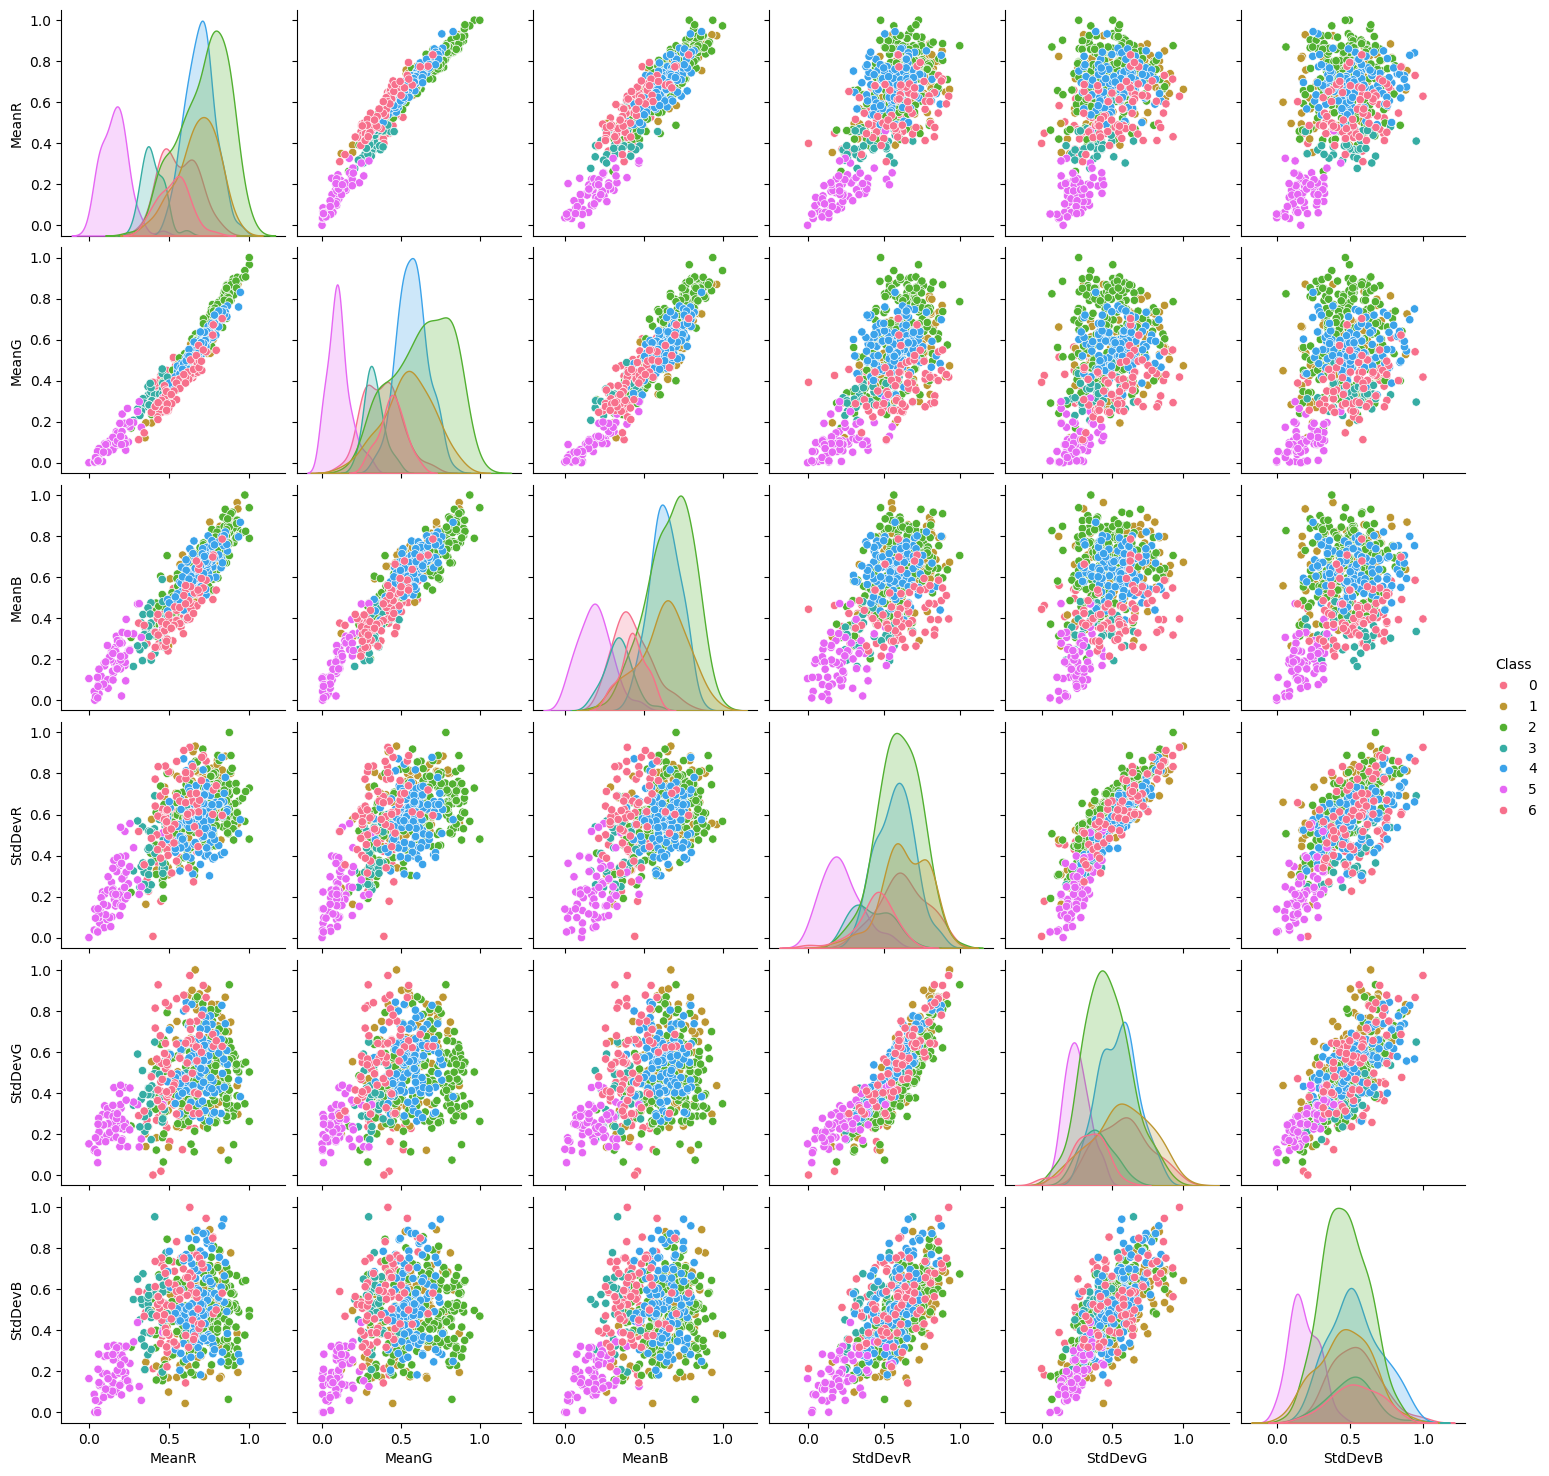

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting features
selected_features = ['MeanR', 'MeanG', 'MeanB', 'StdDevR', 'StdDevG', 'StdDevB', 'Class']
sns.pairplot(df[selected_features], hue='Class', palette="husl", diag_kind="kde")
plt.show()


In [57]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# The DataFrame should be in the df variable.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
       'Roundness', 'AspectRation', 'Compactness', 'ShapeFactor1',
       'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'MeanR', 'MeanG',
       'MeanB', 'StdDevR', 'StdDevG', 'StdDevB', 'SkewnessR', 'SkewnessG',
       'SkewnessB', 'KurtosisR', 'KurtosisG', 'KurtosisB', 'EntropyR',
       'EntropyG', 'EntropyB', 'EnergyR', 'EnergyG', 'EnergyB', 'Class'],
      dtype='object')
First row by position: Area               0.776520
Perimeter          0.778406
MajorAxisLength    0.665425
MinorAxisLength    0.796462
Eccentricity       0.340708
ConvexArea         0.830914
EquivDiameter      0.926027
Extent             0.774414
Solidity           0.704408
Roundness          0.145525
AspectRation       0.841289
Compactness        0.784974
ShapeFactor1       0.111111
ShapeFactor2       0.176471
ShapeFactor3       0.760939
ShapeFactor4       0.712

## Assignment 5.2: Training and Testing Data (2 points)

Split the data into training and testing data using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of the `scikit-learn` library.
Put *75%* of the data in training data.

1. Save the training data and its class variable to the variables `X_train`, `y_train`,
2. Save the test data to the variables `X_test`, `y_test`.

If you think there are unnecessary variables in the data, you should remove them at this stage.

Use the number `1550` as the random seed and the size of the test data *25%*.

In [58]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
file_path = "Date_Fruit_Datasets.xlsx"
df = pd.read_excel(file_path)

# Handle missing values
df.dropna(inplace=True)

# Convert the class variable to numeric labels
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Select features and target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1550)

# Convert training features to DataFrame for display
df_X_train = pd.DataFrame(X_train, columns=df.drop(columns=['Class']).columns)

In [61]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.

df_X_train = pd.DataFrame(X_train, columns=df.drop(columns=['Class']).columns)

# Print dataset sizes
print(f'Total dataset size: {len(df)}')
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

df_X_train.head()

Total dataset size: 898
Training set size: 673
Test set size: 225


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,0.664964,0.743267,0.587795,0.705870,0.656899,0.804401,0.928483,0.666390,0.534748,0.000969,...,0.384724,0.098737,0.293616,0.074650,0.892124,0.866753,0.814375,0.219155,0.156141,0.239709
1,0.249864,0.259302,0.212116,0.436436,0.646520,0.470656,0.935323,0.249838,0.788311,0.000930,...,0.192313,0.038344,0.056138,0.027468,0.850578,0.832156,0.830604,0.603376,0.538402,0.579968
2,0.542547,0.654748,0.500059,0.636235,0.663462,0.720869,0.839552,0.551649,0.440535,0.000994,...,0.429757,0.292251,0.244529,0.098903,0.919329,0.898536,0.873443,0.164511,0.126800,0.194666
3,0.694234,0.744927,0.532622,0.786775,0.489621,0.823210,0.901119,0.698825,0.803140,0.000514,...,0.129495,0.070920,0.080242,0.044485,0.382397,0.351371,0.412514,0.779188,0.671053,0.678960
4,0.484701,0.556253,0.462946,0.592131,0.684524,0.678134,0.966418,0.482599,0.725792,0.001080,...,0.285704,0.020141,0.029404,0.025057,0.594572,0.588050,0.627023,0.736885,0.613084,0.640517


## Assignment 5.3: Implement Support Vector Machine Classification (2 points)

1. Use the `scikit-learn` library's *Linear Support Vector Classification* function to train a classifier with your training data that classifies each date fruit species.

2. Create predictions for the data points of your test data in the `y_pred` variable.

3. Use the `metrics` module to make a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for the predictions of your test data. Save results to the `cr` variable.

4. Use the `metrics` module to make a **confusion matrix** and store it in the `cm` variable.

In [62]:
# Import necessary libraries for classification
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Create and train a Linear Support Vector Classifier (SVC)
svc_classifier = LinearSVC(random_state=1550, dual=False, max_iter=5000)
svc_classifier.fit(X_train, y_train)

# Predict the test data
y_pred = svc_classifier.predict(X_test)

# Generate classification report and confusion matrix
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [63]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# The results are in cm and cr variables.
print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.64      0.41      0.50        17
           2       0.89      0.94      0.92        54
           3       0.87      0.95      0.91        21
           4       0.94      1.00      0.97        44
           5       0.98      1.00      0.99        47
           6       0.82      0.78      0.80        23

    accuracy                           0.90       225
   macro avg       0.87      0.85      0.85       225
weighted avg       0.89      0.90      0.90       225

Confusion matrix:
 [[16  0  0  3  0  0  0]
 [ 0  7  6  0  1  0  3]
 [ 0  2 51  0  0  0  1]
 [ 1  0  0 20  0  0  0]
 [ 0  0  0  0 44  0  0]
 [ 0  0  0  0  0 47  0]
 [ 0  2  0  0  2  1 18]]


## Assignment 5.4: Comparison with another ML method  (2 points)

For comparison, try to develop the model using another classification method:
* The method can be **RandomForest** (or if you want **DecisionTree** etc., but still justify your choice).

So you can freely select the ML classification method used in this comparison.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = "Date_Fruit_Datasets.xlsx"
df = pd.read_excel(file_path)

# Handle missing values
df.dropna(inplace=True)

# Convert target variable to numeric labels
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Define features and target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Convert to numpy array

# Split the dataset (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1550)

# ✅ Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1550)
rf_classifier.fit(X_train, y_train)

# Predict test data
y_pred_rf = rf_classifier.predict(X_test)

# Generate classification report and confusion matrix
cr_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print results
print(f'Classification report (Random Forest):\n {cr_rf}')
print(f'Confusion matrix (Random Forest):\n {cm_rf}')

Classification report (Random Forest):
               precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.52      0.65      0.58        17
           2       0.94      0.91      0.92        54
           3       0.83      0.95      0.89        21
           4       0.98      0.95      0.97        44
           5       1.00      1.00      1.00        47
           6       0.82      0.78      0.80        23

    accuracy                           0.90       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.91      0.90      0.90       225

Confusion matrix (Random Forest):
 [[15  0  0  4  0  0  0]
 [ 0 11  3  0  0  0  3]
 [ 0  5 49  0  0  0  0]
 [ 1  0  0 20  0  0  0]
 [ 0  1  0  0 42  0  1]
 [ 0  0  0  0  0 47  0]
 [ 0  4  0  0  1  0 18]]


## Assignment 5.5: Analysis of the results (2 points)

Verbally interpret the obtained results from both ML methods.
* How well the support vector did in the classification
* How well the another ML method did in the classification

Let's do comparison of Different Classification Models used in this assignment.
* Compare the classification results of SVM and Selected Classification models.
* Compare the obtained results and interpret the results verbally.
* Compare the **accuracy** and **confusion matrix** of the classification results for both methods.

Accuracy of SVM: 0.9022
Accuracy of Random Forest: 0.8978


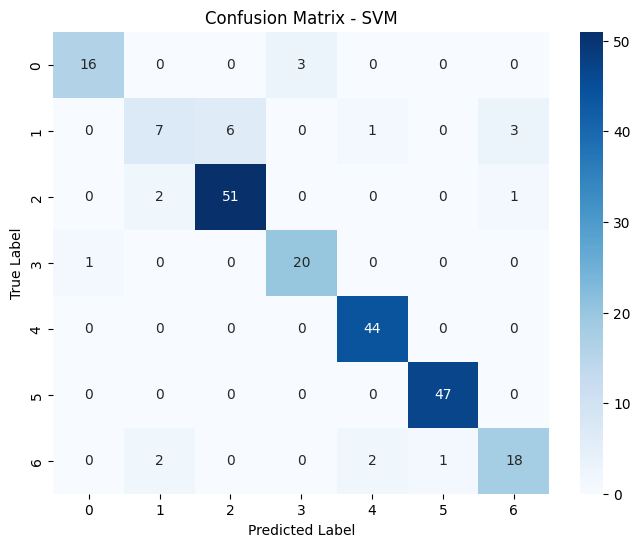

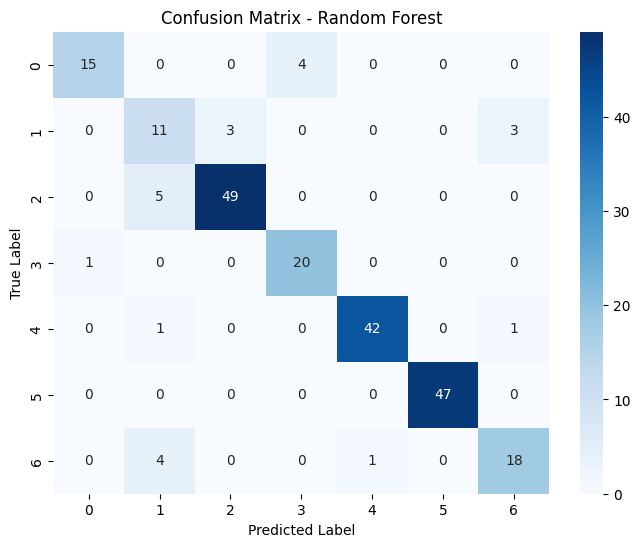

In [67]:
# TODO: Compare the accuracy of the classification results of both classification methods.
# TODO: Compare the confusion matrix of both classification methods with each other.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

# Compute accuracy for both models
accuracy_svm = accuracy_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy comparison
print(f"Accuracy of SVM: {accuracy_svm:.4f}")
print(f"Accuracy of Random Forest: {accuracy_rf:.4f}")

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot Confusion Matrices for both models
plot_confusion_matrix(cm, "Confusion Matrix - SVM")
plot_confusion_matrix(cm_rf, "Confusion Matrix - Random Forest")


<font color="red">PLEASE WRITE YOUR EXPLANATION HERE.</font>

Q: Are there other good classification methods to apply with this dataset or any other way to improve the classification results?

### Comparison of Support Vector Machine (SVM) and Random Forest Classifier on Date Fruit Dataset

#### **Performance of Support Vector Machine (SVM)**
1. **Classification Report (SVM)**
- **Overall Accuracy**: 90%
- **Macro Average Precision & Recall**: 0.87 / 0.85
- **Weighted Average Precision & Recall**: 0.89 / 0.90
- **Best Performance**: Class 5 (98% precision, 100% recall)
- **Weakest Performance**: Class 1 (64% precision, 41% recall)

2. **Confusion Matrix (SVM)**

| Predicted \ Actual | Class 0 | Class 1 | Class 2 | Class 3 | Class 4 | Class 5 | Class 6 |
|---|---|---|---|---|---|---|---|
| Class 0 | 16 | 0 | 0 | 3 | 0 | 0 | 0 |
| Class 1 | 0  | 7 | 6 | 0 | 1 | 0 | 3 |
| Class 2 | 0 | 2  | 51  | 0 | 0 | 0 | 1 |
| Class 3 | 1 | 0  | 0 | 20 | 0 | 0 | 0 |
| Class 4 | 0 | 0 |  0 | 0 | 44 | 0 | 0 |
| Class 5 | 0  | 0 | 0 | 0 | 0 | 47 | 0 |
| Class 6 | 0  | 2 | 0 | 0 | 2 | 1 | 18  |

3. **Interpretation of SVM Results**

**Strengths**:

- Good precision and recall for most classes (above 80%).
Class 5 and Class 4 are well classified (97-99% f1-score).
SVM works well for linearly separable data.

**Weaknesses:**

- Class 1 had poor recall (41%), meaning it often misclassified samples.
Some misclassifications for Class 2 and Class 6.
SVM may struggle with non-linear boundaries.

###  Performance of Random Forest Classifier

1. **Classification Report (Random Forest)**

- **Overall Accuracy**: 90%
- **Macro Average Precision & Recall**: 0.86 / 0.86
- **Weighted Average Precision & Recall**: 0.91 / 0.90
- **Best Performance**: Class 5 (100% precision, 100% recall)
- **Weakest Performance**: Class 1 (52% precision, 65% recall)

2. **Confusion Matrix (Random Forest)**

| Predicted \ Actual | Class 0 | Class 1 | Class 2 | Class 3 | Class 4 | Class 5 | Class 6 |
|---|---|---|---|---|---|---|---|
| Class 0 | 15 | 0 | 0 | 4 | 0 | 0 | 0 |
| Class 1 | 0  | 11 | 3 | 0 | 0 | 0 | 3 |
| Class 2 | 0 | 5  | 49  | 0 | 0 | 0 | 0 |
| Class 3 | 1 | 0  | 0 | 20 | 0 | 0 | 0 |
| Class 4 | 0 | 1 |  0 | 0 | 42 | 0 | 1 |
| Class 5 | 0  | 0 | 0 | 0 | 0 | 47 | 0 |
| Class 6 | 0  | 4 | 0 | 0 | 1 | 0 | 18  |

3. **Interpretation of Random Forest Results**

**Strengths**:

- Similar accuracy to SVM (90%) but slightly better precision and recall.
- Class 5 achieved perfect classification (100%).
- Higher recall for Class 1 (65%) compared to SVM (41%).
- Random Forest is more robust to noisy data.

**Weaknesses**:

- Some misclassifications for Class 2 and Class 6.
- Class 1 precision was lower (52%) compared to SVM (64%).

### Comparing SVM vs. Random Forest

| Metric | SVM (LinearSVC) | Random Forest |
|---|---|---|
| Accuracy | 90% | 	90% |
| Best Precision/Recall | 	Class 5 (98% / 100%)  | Class 5 (100% / 100%)  |
| Worst Precision/Recall | Class 1 (64% / 41%)  | Class 1 (52% / 65%)  |
| Misclassifications | Class 1 & Class 6  | Class 2 & Class 6  |
| Handling Non-Linear Data | Not ideal  | Better  |
| Overfitting Risk | Lower  | Slightly higher  |
| Computational Cost | Higher  | Moderate  |
| Feature Importance | Hard to interpret  | Easier to interpret  |

#### Key Takeaways
- SVM is more precise in Class 1 but has lower recall (many false negatives).
- Random Forest improved Class 1 recall from 41% to 65%.
- Both models had similar overall accuracy (90%), but Random Forest is more robust.

#### Confusion Matrix Comparison
- SVM struggled more with Class 1 (41% recall).
- Random Forest confused fewer samples for Class 1, boosting recall to 65%.
- Random Forest had slightly better overall recall and was better at handling noise.

#### Are There Better Classification Methods?
Yes! Other models could improve classification:

**Gradient Boosting (XGBoost, LightGBM)**
- More powerful than Random Forest.
- Reduces overfitting.
- Handles imbalanced datasets better.

**Neural Networks (Deep Learning)**
- Handles highly non-linear relationships.
- Requires more data for better results.

**k-Nearest Neighbors (k-NN)**
- Simple & effective for small datasets.
- Sensitive to noise, making it less ideal here.

**Hyperparameter Tuning**
- Regardless of the model, optimizing hyperparameters (e.g., adjusting C in SVM or tuning the number of trees in Random Forest) can significantly improve results.

#### Conclusion: Which Model is Better?

**Random Forest is the better choice for this dataset due to:**

- Better recall for difficult classes (Class 1 improved from 41% to 65%).
- More stable performance across all classes.
- Handles noisy and non-linear data better.

**SVM still performed well**, but struggles with recall in non-linearly separable classes.

#### Final Recommendations

- Use Random Forest or Gradient Boosting for better classification.
- Hyperparameter tuning can further improve accuracy and recall.
- Feature selection can help improve SVM performance.
- Consider ensemble methods like Stacking Classifier.